In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.linear_model import LogisticRegression
from keras.layers import Dense
from keras import regularizers
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files
uploaded = files.upload()

Saving Integrated.csv to Integrated.csv


In [3]:
tdata = pd.read_csv("Integrated.csv",header=None,na_values=[-9])

In [4]:
new_data = tdata[[2,3,8,9,14,15,16,17,18,31,57]].copy()
#data = new_data.values


In [5]:
new_data.columns = ['Age','Sex','Chest Pain','Blood Pressure','Smoking Years','Fasting Blood Sugar','Diabetes History',
                    'Family history Cornory','ECG','Pulse Rate','Target']

In [6]:
print(new_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     899 non-null    int64  
 1   Sex                     899 non-null    int64  
 2   Chest Pain              899 non-null    int64  
 3   Blood Pressure          840 non-null    float64
 4   Smoking Years           467 non-null    float64
 5   Fasting Blood Sugar     809 non-null    float64
 6   Diabetes History        95 non-null     float64
 7   Family history Cornory  477 non-null    float64
 8   ECG                     897 non-null    float64
 9   Pulse Rate              844 non-null    float64
 10  Target                  899 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 77.4 KB
None


In [7]:
new_data['Blood Pressure'].fillna(new_data['Blood Pressure'].mean(),inplace=True)
new_data['Smoking Years'].fillna(new_data['Smoking Years'].mean(),inplace=True)
new_data['Fasting Blood Sugar'].fillna(new_data['Fasting Blood Sugar'].mean(),inplace=True)
new_data['Diabetes History'].fillna(new_data['Diabetes History'].mode()[0],inplace=True)
new_data['Family history Cornory'].fillna(new_data['Family history Cornory'].mode()[0],inplace=True)
new_data['ECG'].fillna(new_data['ECG'].mean(),inplace=True)
new_data['Pulse Rate'].fillna(new_data['Pulse Rate'].mean(),inplace=True)

     Age  Sex  Chest Pain  Blood Pressure  Smoking Years  Fasting Blood Sugar  \
0     63    1           1           145.0      20.000000             1.000000   
1     67    1           4           160.0      40.000000             0.000000   
2     67    1           4           120.0      35.000000             0.000000   
3     37    1           3           130.0       0.000000             0.000000   
4     41    0           2           130.0       0.000000             0.000000   
..   ...  ...         ...             ...            ...                  ...   
894   54    1           4           180.0      18.796574             0.166873   
895   56    1           4           125.0      18.796574             1.000000   
896   56    1           3           125.0      18.796574             0.166873   
897   54    1           4           130.0      18.796574             0.166873   
898   66    0           4           155.0      18.796574             0.166873   

     Diabetes History  Fami

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

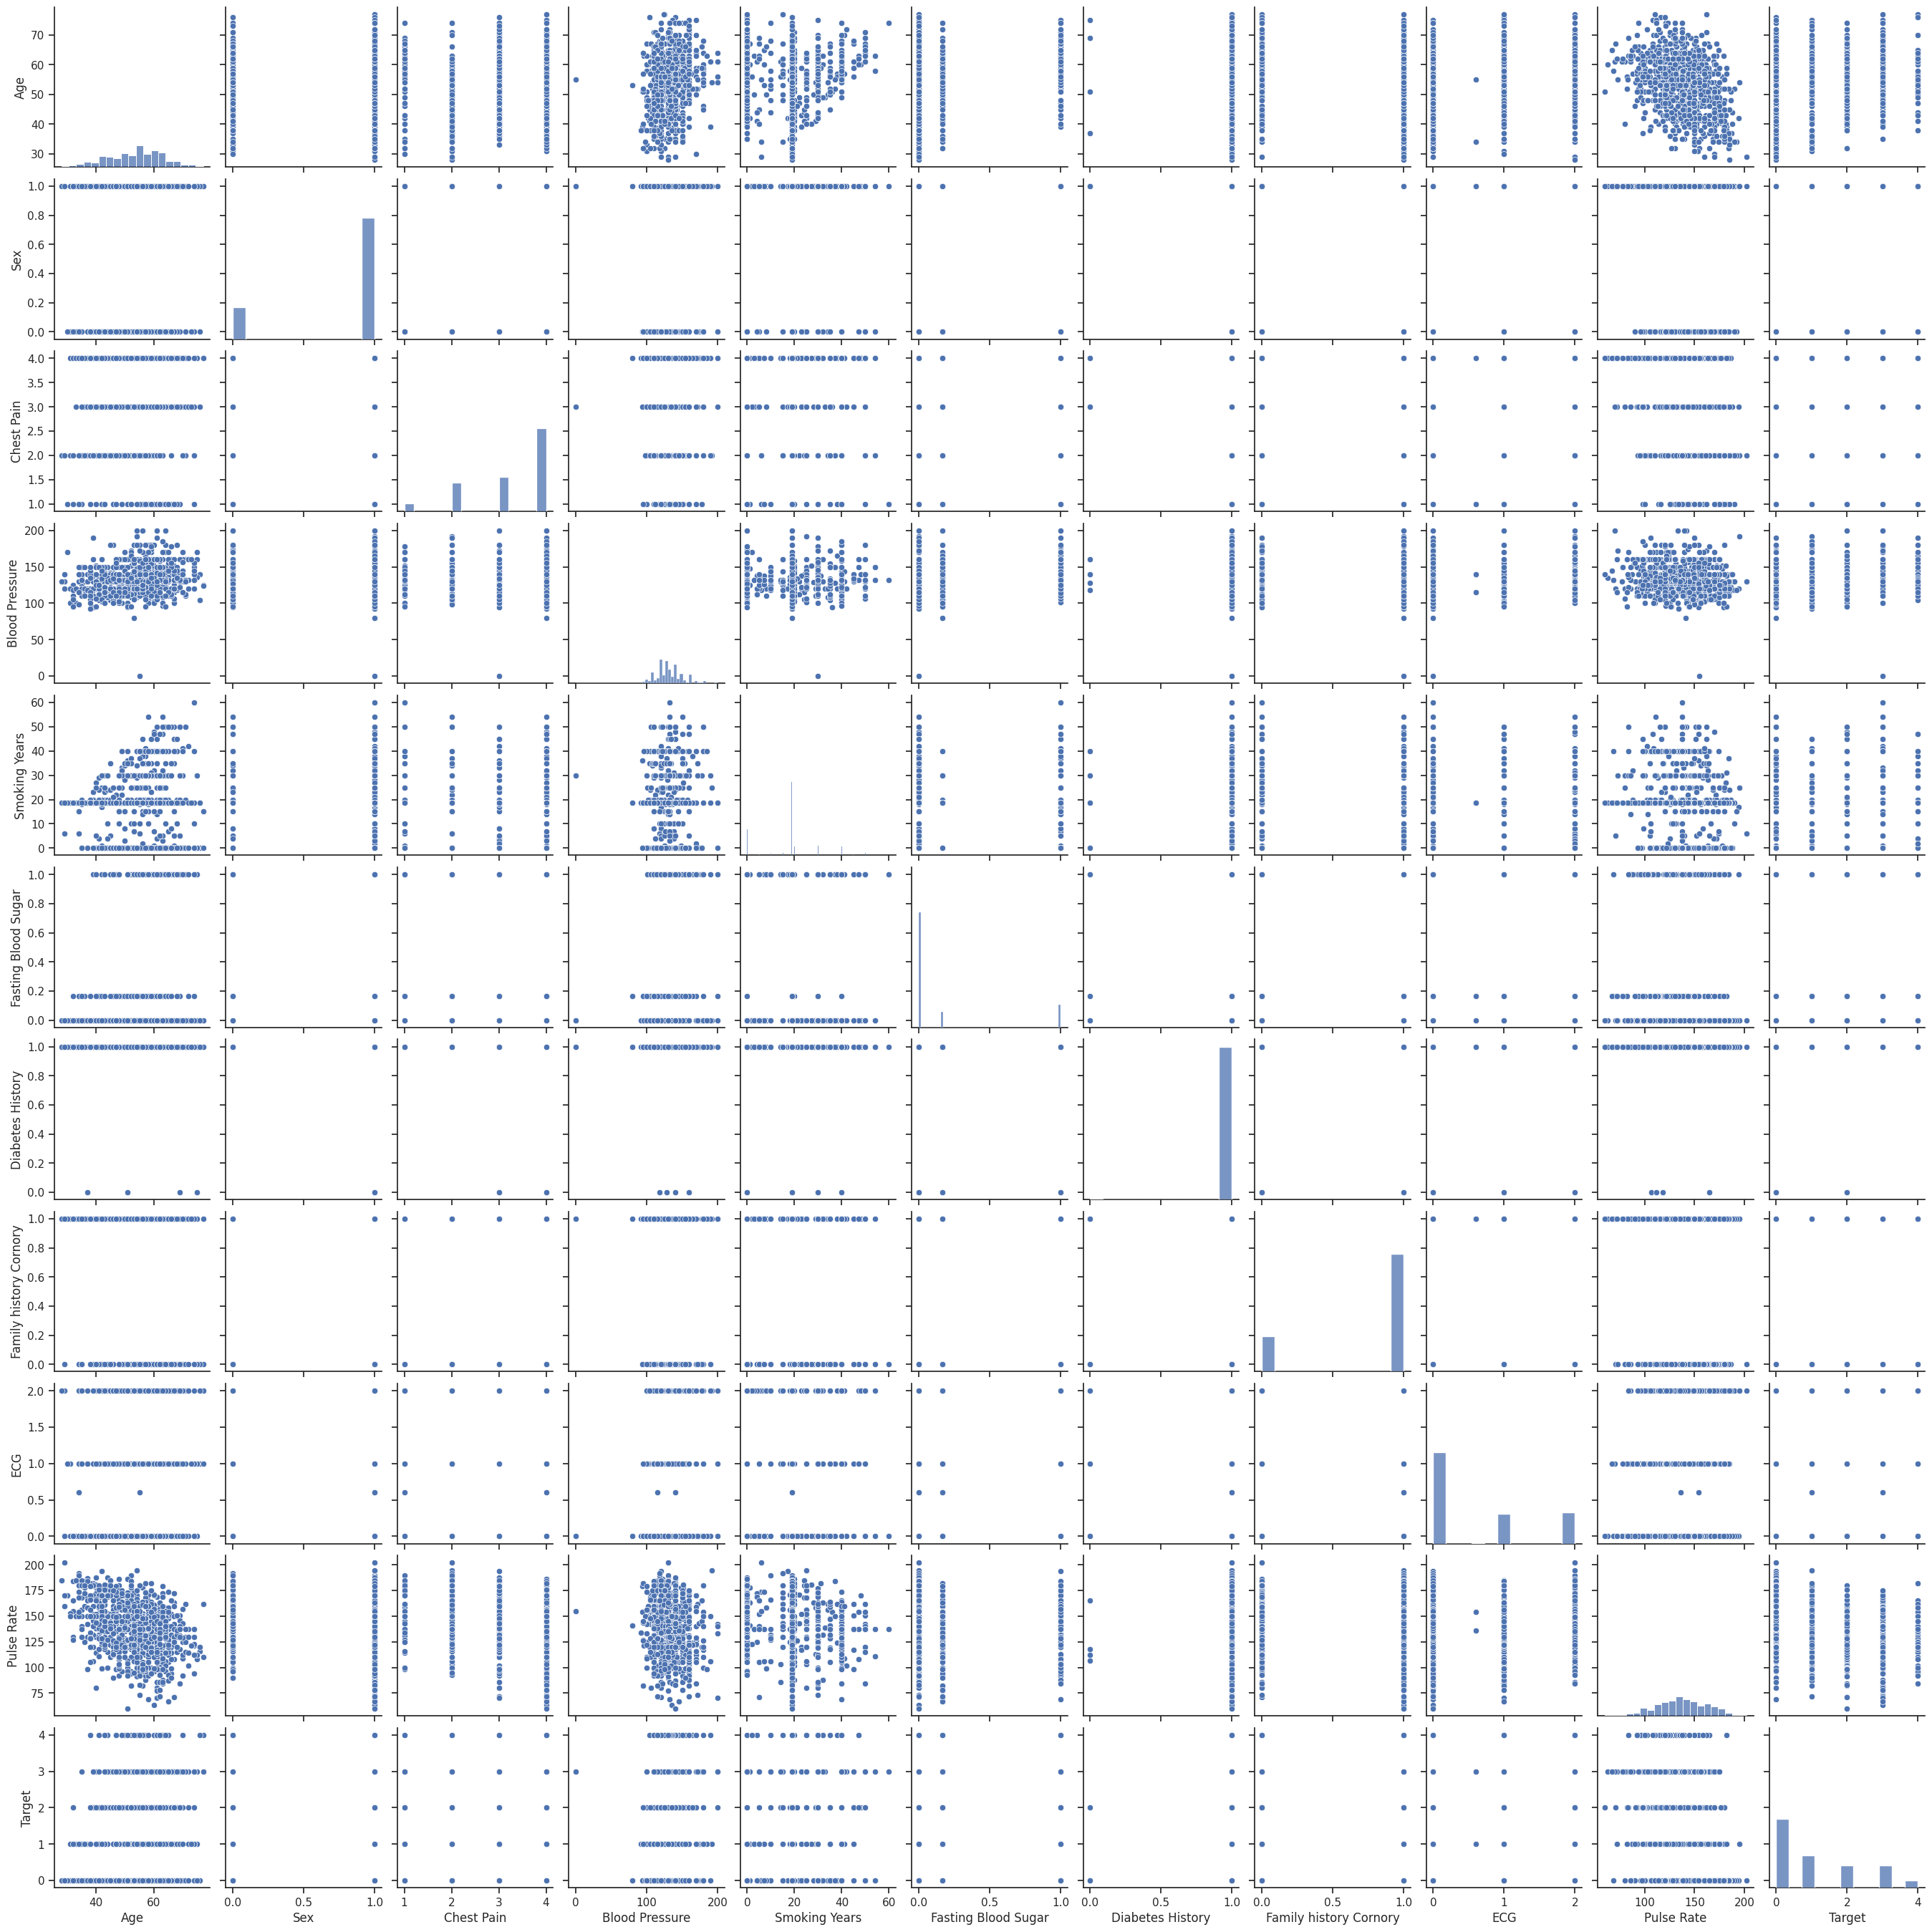

In [8]:
print(new_data)
#print(new_data.info())
sns.set(style="ticks", color_codes=True)
ax = sns.pairplot(new_data,palette="husl")
plt.show()
#plt.savefig("Pair_Plot.jpg")

In [9]:
print(new_data['Target'].value_counts())

Target
0    404
1    191
3    132
2    130
4     42
Name: count, dtype: int64


In [10]:
new_data.replace({'Target' : 0}, 0, inplace=True)
new_data.replace({'Target' : 1}, 0, inplace=True)
new_data.replace({'Target' : 2}, 0, inplace=True)
new_data.replace({'Target' : 3}, 1, inplace=True)
new_data.replace({'Target' : 4}, 1, inplace=True)

In [11]:
data = new_data.values
print(data)
#print(data.shape)


[[ 63.   1.   1. ...   2. 150.   0.]
 [ 67.   1.   4. ...   2. 108.   0.]
 [ 67.   1.   4. ...   2. 129.   0.]
 ...
 [ 56.   1.   3. ...   0.  98.   0.]
 [ 54.   1.   4. ...   0. 110.   1.]
 [ 66.   0.   4. ...   0.  90.   0.]]


Target and Features Split

In [12]:
X = data[:,:-1]
#print(X)
y = data[:,-1]
#print(y)
y = y.reshape((y.shape[0],1))


Normalization

In [13]:
n_X = preprocessing.normalize(X)
n_y = preprocessing.normalize(y)
n_y = n_y.reshape((n_y.shape[0],))

Train_Test_Split

In [14]:
training_X, testing_X, training_y, testing_y = train_test_split(n_X,n_y,test_size=0.10,random_state=70)

print('Training data: '+str(training_X.shape) +' '+ str(training_y.shape))
print('Testing  data: '+str(testing_X.shape) +' '+str(testing_y.shape))

Training data: (809, 10) (809,)
Testing  data: (90, 10) (90,)


Using Support Vector Machine

In [15]:
print('Support Vector Machine')
#clf  = svm.SVC(gamma='auto')
clf = svm.SVC(kernel='rbf',C=5,gamma='auto')
clf.fit(training_X,training_y)
#prediction = clf.predict(testing_X)
#print(prediction)
#print(testing_y)
r = clf.score(testing_X,testing_y)
print(r)

Support Vector Machine
0.8555555555555555


Using Logistic Regression

In [16]:
print('Logistic Regression')
clf = LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial')
clf.fit(training_X,training_y)
clf.predict(testing_X)
r = clf.score(testing_X,testing_y)
print(r)

Logistic Regression
0.8555555555555555


Using KNN

In [17]:
print('K Nearest Neighbors')
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(training_X,training_y)
y_prediction = knn.predict(testing_X)
score = metrics.accuracy_score(testing_y,y_prediction)
print(score)

training_y = np.expand_dims(training_y, axis=1)


K Nearest Neighbors
0.7777777777777778


Using Neural Net

In [19]:
print('Multi Layer Perceptron Deep Learning Model')
model = Sequential()
model.add(Dense(units=10,activation='relu',input_dim=10,kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(units=8,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adadelta',metrics=['accuracy'])
model.fit(training_X,training_y,epochs=200)

loss_and_metrics = model.evaluate(testing_X,testing_y)

print(loss_and_metrics)

Multi Layer Perceptron Deep Learning Model
Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1859 - loss: 5.1316
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1829 - loss: 5.1242 
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1994 - loss: 5.1223 
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2089 - loss: 5.1134 
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1896 - loss: 5.1116 
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2068 - loss: 5.1089 
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2076 - loss: 5.1035 
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1848 - loss: 5.0962 
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2037 - loss: 5.0916 
Epoch 10/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2109 - loss: 5.0904 
Epoch 11/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2075 - loss: 5.0820 
Epoch 12/2